This file is to pre-process and tokenize the numerical data (and all other data that could be transformed into numerical data).

In [2]:
import numpy as np
import pandas as pd

/Users/xinyutian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/xinyutian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
# read the train & test.csv file
train = pd.read_csv('raw_data/train.csv')

In [6]:
train.dtypes

id                                                int64
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
picture_url                                      object
host_id                                           int64
host_name                                        object
host_since                                       object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        

In [17]:
# drop columns: 'id', 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url', 'host_name', 'host_verifications', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'calendar_last_scraped'
train_num = train.drop(['host_id', 'id', 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url', 'host_name', 'host_verifications', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'calendar_last_scraped'], axis=1)
train_num.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2018-07-27,f,5.0,7.0,t,t,33.82749,-118.30795,Shared room in home,Shared room,...,88,363,0,0,0,f,5,0,0,5
1,2013-07-19,t,3.0,3.0,t,t,33.98404,-118.47002,Entire rental unit,Entire home/apt,...,40,296,81,24,2,f,3,3,0,0
2,2019-06-24,f,118.0,189.0,t,t,33.34187,-118.32847,Entire home,Entire home/apt,...,58,201,3,2,0,t,113,113,0,0
3,2021-11-01,f,5.0,6.0,t,t,34.45016,-118.55382,Entire home,Entire home/apt,...,90,364,0,0,0,f,3,3,0,0
4,2023-02-20,f,1020.0,1414.0,t,t,34.06036,-118.44171,Room in hotel,Private room,...,70,269,0,0,0,t,80,21,59,0


In [18]:
# transform the 'host_since' column to 'host_since_days'
train_num['host_since_days'] = (datetime.datetime.now() - pd.to_datetime(train_num['host_since'])).dt.days
train_num = train_num.drop(['host_since'], axis=1)
train_num.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_since_days
0,f,5.0,7.0,t,t,33.82749,-118.30795,Shared room in home,Shared room,3,...,363,0,0,0,f,5,0,0,5,1950
1,t,3.0,3.0,t,t,33.98404,-118.47002,Entire rental unit,Entire home/apt,6,...,296,81,24,2,f,3,3,0,0,3784
2,f,118.0,189.0,t,t,33.34187,-118.32847,Entire home,Entire home/apt,8,...,201,3,2,0,t,113,113,0,0,1618
3,f,5.0,6.0,t,t,34.45016,-118.55382,Entire home,Entire home/apt,7,...,364,0,0,0,f,3,3,0,0,757
4,f,1020.0,1414.0,t,t,34.06036,-118.44171,Room in hotel,Private room,2,...,269,0,0,0,t,80,21,59,0,281


In [19]:
train_num['host_is_superhost'] = train_num['host_is_superhost'].map({'t': 1, 'f': 0})
train_num['host_has_profile_pic'] = train_num['host_has_profile_pic'].map({'t': 1, 'f': 0})
train_num['host_identity_verified'] = train_num['host_identity_verified'].map({'t': 1, 'f': 0})
train_num['instant_bookable'] = train_num['instant_bookable'].map({'t': 1, 'f': 0})

In [22]:
# add a column 'location' by using tuples of 'latitude' and 'longitude'
train_num['location'] = list(zip(train_num.latitude, train_num.longitude))
train_num = train_num.drop(['latitude', 'longitude'], axis=1)
train_num.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_since_days,location
0,0.0,5.0,7.0,1,1,Shared room in home,Shared room,3,1 shared bath,1.0,...,0,0,0,0,5,0,0,5,1950,"(33.82749, -118.30795)"
1,1.0,3.0,3.0,1,1,Entire rental unit,Entire home/apt,6,2 baths,2.0,...,81,24,2,0,3,3,0,0,3784,"(33.98404, -118.47002)"
2,0.0,118.0,189.0,1,1,Entire home,Entire home/apt,8,2 baths,4.0,...,3,2,0,1,113,113,0,0,1618,"(33.34187, -118.32847)"
3,0.0,5.0,6.0,1,1,Entire home,Entire home/apt,7,2.5 baths,5.0,...,0,0,0,0,3,3,0,0,757,"(34.45016, -118.55382)"
4,0.0,1020.0,1414.0,1,1,Room in hotel,Private room,2,1 bath,1.0,...,0,0,0,1,80,21,59,0,281,"(34.06036, -118.44171)"


In [23]:
# use 0,1,2 to represent the 'room_type' for 'shared room', 'private room' and 'entire home/apt'
train_num['room_type'] = train_num['room_type'].map({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
train_num.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,beds,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_since_days,location
0,0.0,5.0,7.0,1,1,Shared room in home,0.0,3,1 shared bath,1.0,...,0,0,0,0,5,0,0,5,1950,"(33.82749, -118.30795)"
1,1.0,3.0,3.0,1,1,Entire rental unit,2.0,6,2 baths,2.0,...,81,24,2,0,3,3,0,0,3784,"(33.98404, -118.47002)"
2,0.0,118.0,189.0,1,1,Entire home,2.0,8,2 baths,4.0,...,3,2,0,1,113,113,0,0,1618,"(33.34187, -118.32847)"
3,0.0,5.0,6.0,1,1,Entire home,2.0,7,2.5 baths,5.0,...,0,0,0,0,3,3,0,0,757,"(34.45016, -118.55382)"
4,0.0,1020.0,1414.0,1,1,Room in hotel,1.0,2,1 bath,1.0,...,0,0,0,1,80,21,59,0,281,"(34.06036, -118.44171)"


host_is_superhost -0.013648505672218736


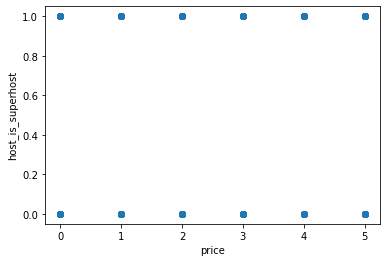

host_listings_count -0.01834212143304209


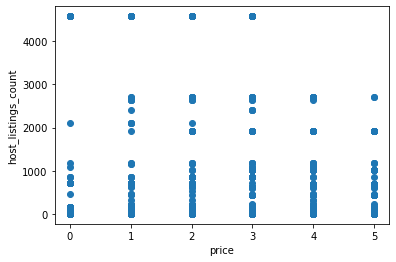

host_total_listings_count 0.0023965987192860537


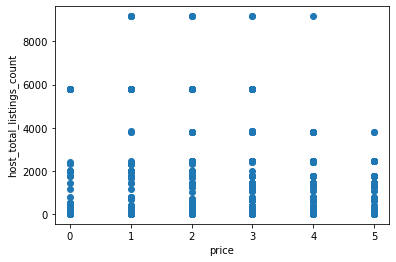

host_has_profile_pic 0.014125354439383384


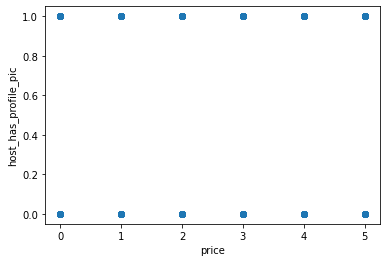

host_identity_verified 0.013653364941267112


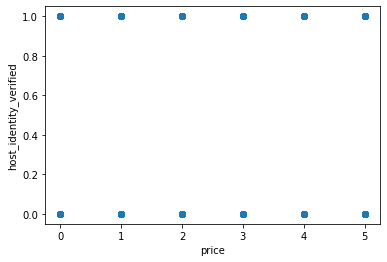

room_type 0.2742632714202057


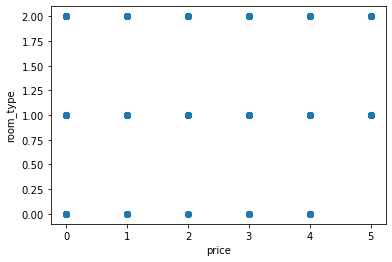

accommodates 0.5804486958234282


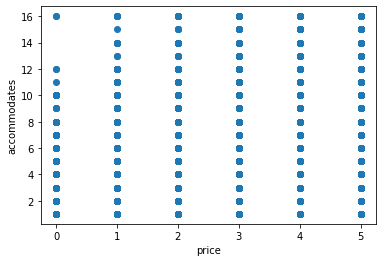

beds 0.511207769947389


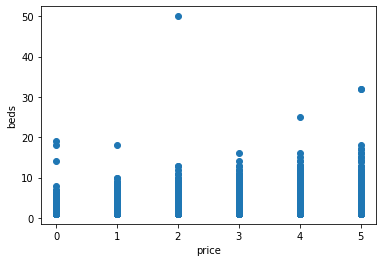

minimum_nights -0.03864798128686561


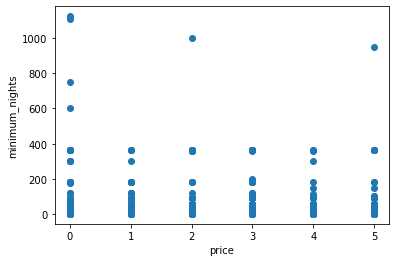

maximum_nights -0.0010363469048686347


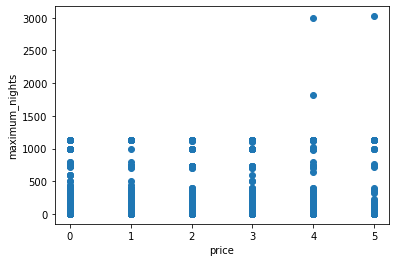

minimum_minimum_nights -0.038466420408133896


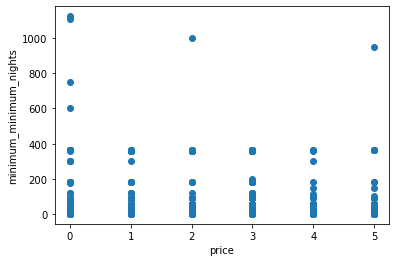

maximum_minimum_nights -0.07947431371672975


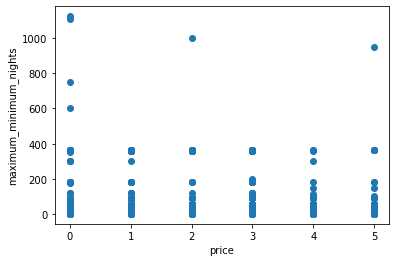

minimum_maximum_nights 0.003843919420947737


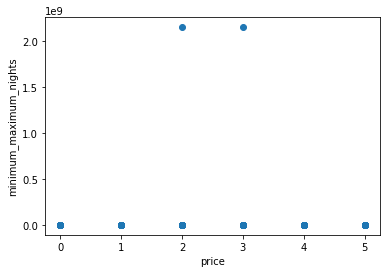

maximum_maximum_nights 0.003844737867582203


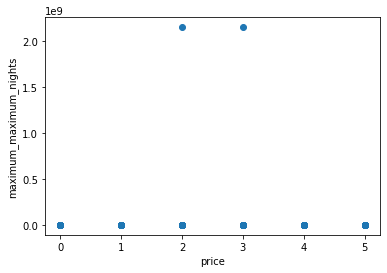

minimum_nights_avg_ntm -0.0798444081301856


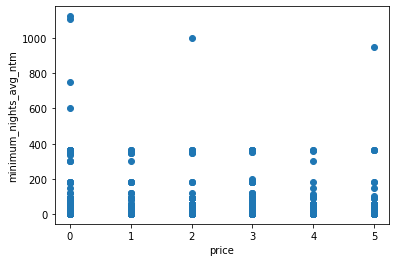

maximum_nights_avg_ntm 0.0038442825642126402


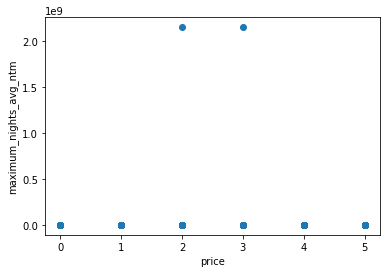

availability_30 0.15519046151103943


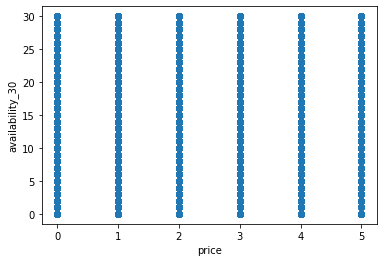

availability_60 0.12663652275704343


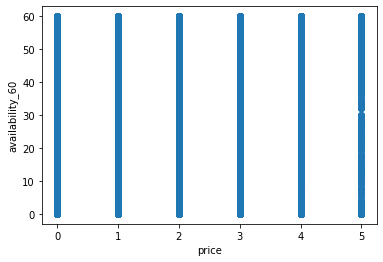

availability_90 0.10679576730719337


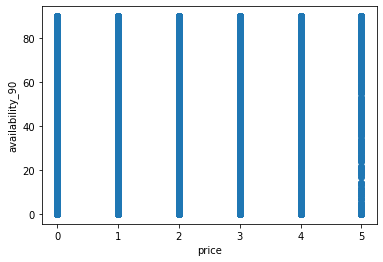

availability_365 0.07925092915326595


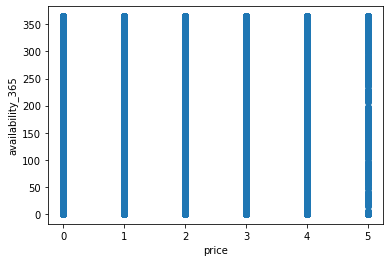

number_of_reviews -0.11482158221487974


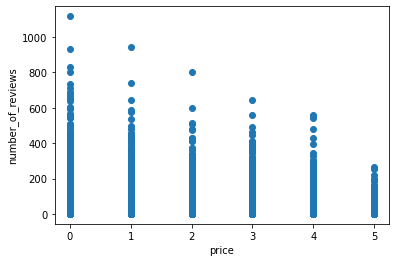

number_of_reviews_ltm -0.08262895863128998


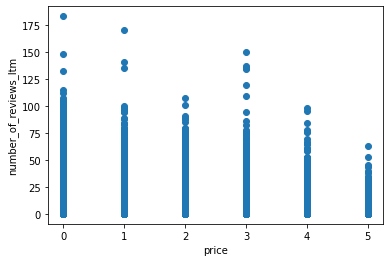

number_of_reviews_l30d -0.07306921614297186


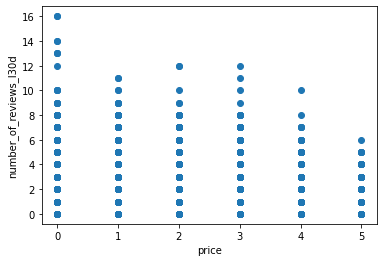

instant_bookable 0.0539491925831634


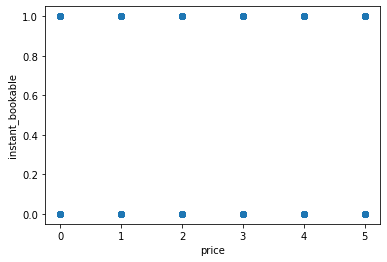

calculated_host_listings_count -0.012411565442087932


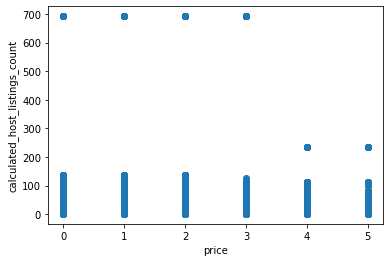

calculated_host_listings_count_entire_homes -0.012440990223628847


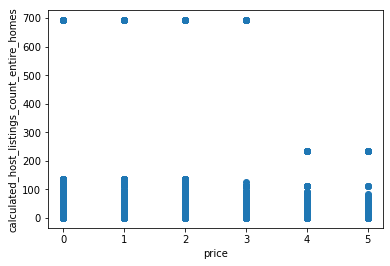

calculated_host_listings_count_private_rooms 0.012584697927500133


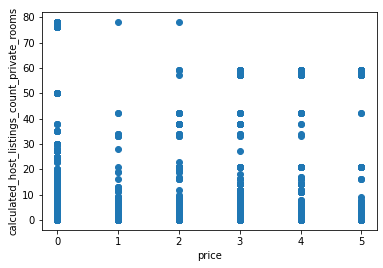

calculated_host_listings_count_shared_rooms -0.06283220040995578


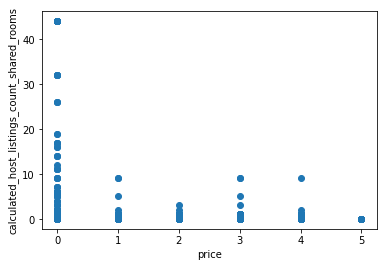

host_since_days -0.018978599434622496


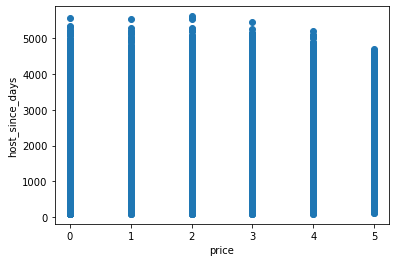

[('room_type', 0.2742632714202057), ('accommodates', 0.5804486958234282), ('beds', 0.511207769947389), ('availability_30', 0.15519046151103943), ('availability_60', 0.12663652275704343), ('availability_90', 0.10679576730719337), ('number_of_reviews', -0.11482158221487974)]


In [35]:
# for every numeric column, calculate the correlation coefficient with 'price' and plot a scatter plot
import matplotlib.pyplot as plt
# import seaborn as sns
# drop null values
train_num = train_num.dropna()
count = []
for col in train_num.columns:
    if col != 'price':
        if train_num[col].dtype == 'str':
            continue
        elif train_num[col].dtype == 'object':
            continue
        corr = train_num['price'].corr(train_num[col])
        print(col, corr)
        if abs(corr) >= 0.1:
            count.append((col, corr))
        plt.scatter(train_num['price'], train_num[col])
        plt.ylabel(col)
        plt.xlabel('price')
        plt.show()
print(count)

In [36]:
count

[('room_type', 0.2742632714202057),
 ('accommodates', 0.5804486958234282),
 ('beds', 0.511207769947389),
 ('availability_30', 0.15519046151103943),
 ('availability_60', 0.12663652275704343),
 ('availability_90', 0.10679576730719337),
 ('number_of_reviews', -0.11482158221487974)]

In [40]:
# calculate the correlation between 'availability_30' and 'availability_90'
train_num['availability_60'].corr(train_num['availability_90'])

0.9765186502486459